# Data Preprocessing

Для моделирования были получены данные по диагностике заболеваний с результиующей переменной-классификатором в значениях 1-болен, 0-здоров. Исходный датасет имеет 10 переменных.
На первом этапе осуществим подготовку данных. Сперва импортируем необходимые библиотеки, вторым шагом загрузим файл с данными в формате csv.

In [267]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [268]:
# Importing the dataset
df = pd.read_csv('kr2_gavr.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. Имеем 10 столбцов, 615 строк.

In [269]:
df

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,m,38.5,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,m,46.9,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,m,43.2,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,m,39.2,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,50.0,5.57,6.30,55.7,650.9,68.5,1
611,64,f,24.0,20.0,1.54,3.02,63.0,35.9,71.3,1
612,64,f,29.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,46,f,33.0,20.0,3.56,4.20,52.0,50.0,71.0,1


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование:

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


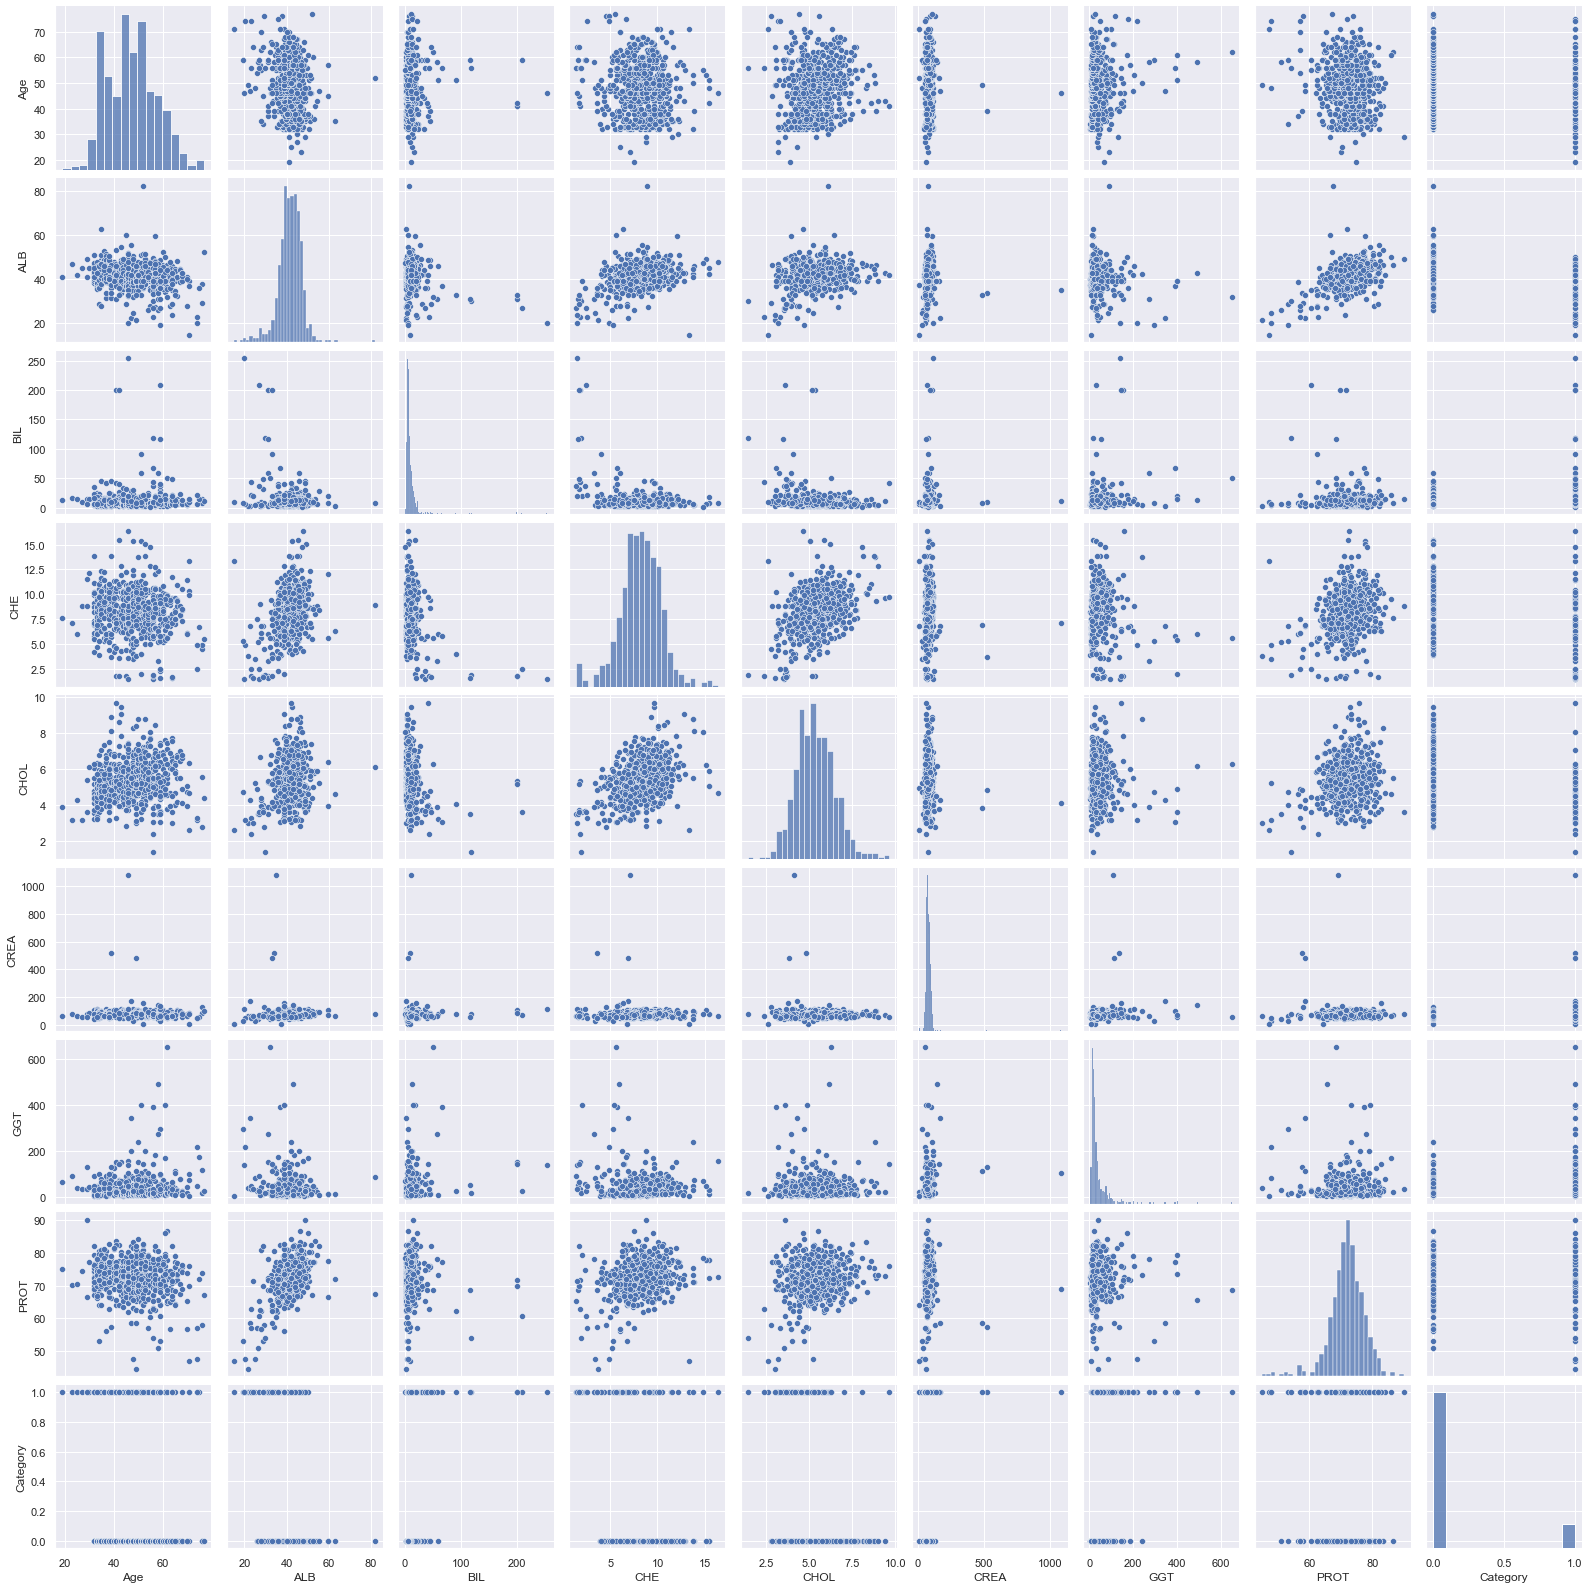

In [270]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


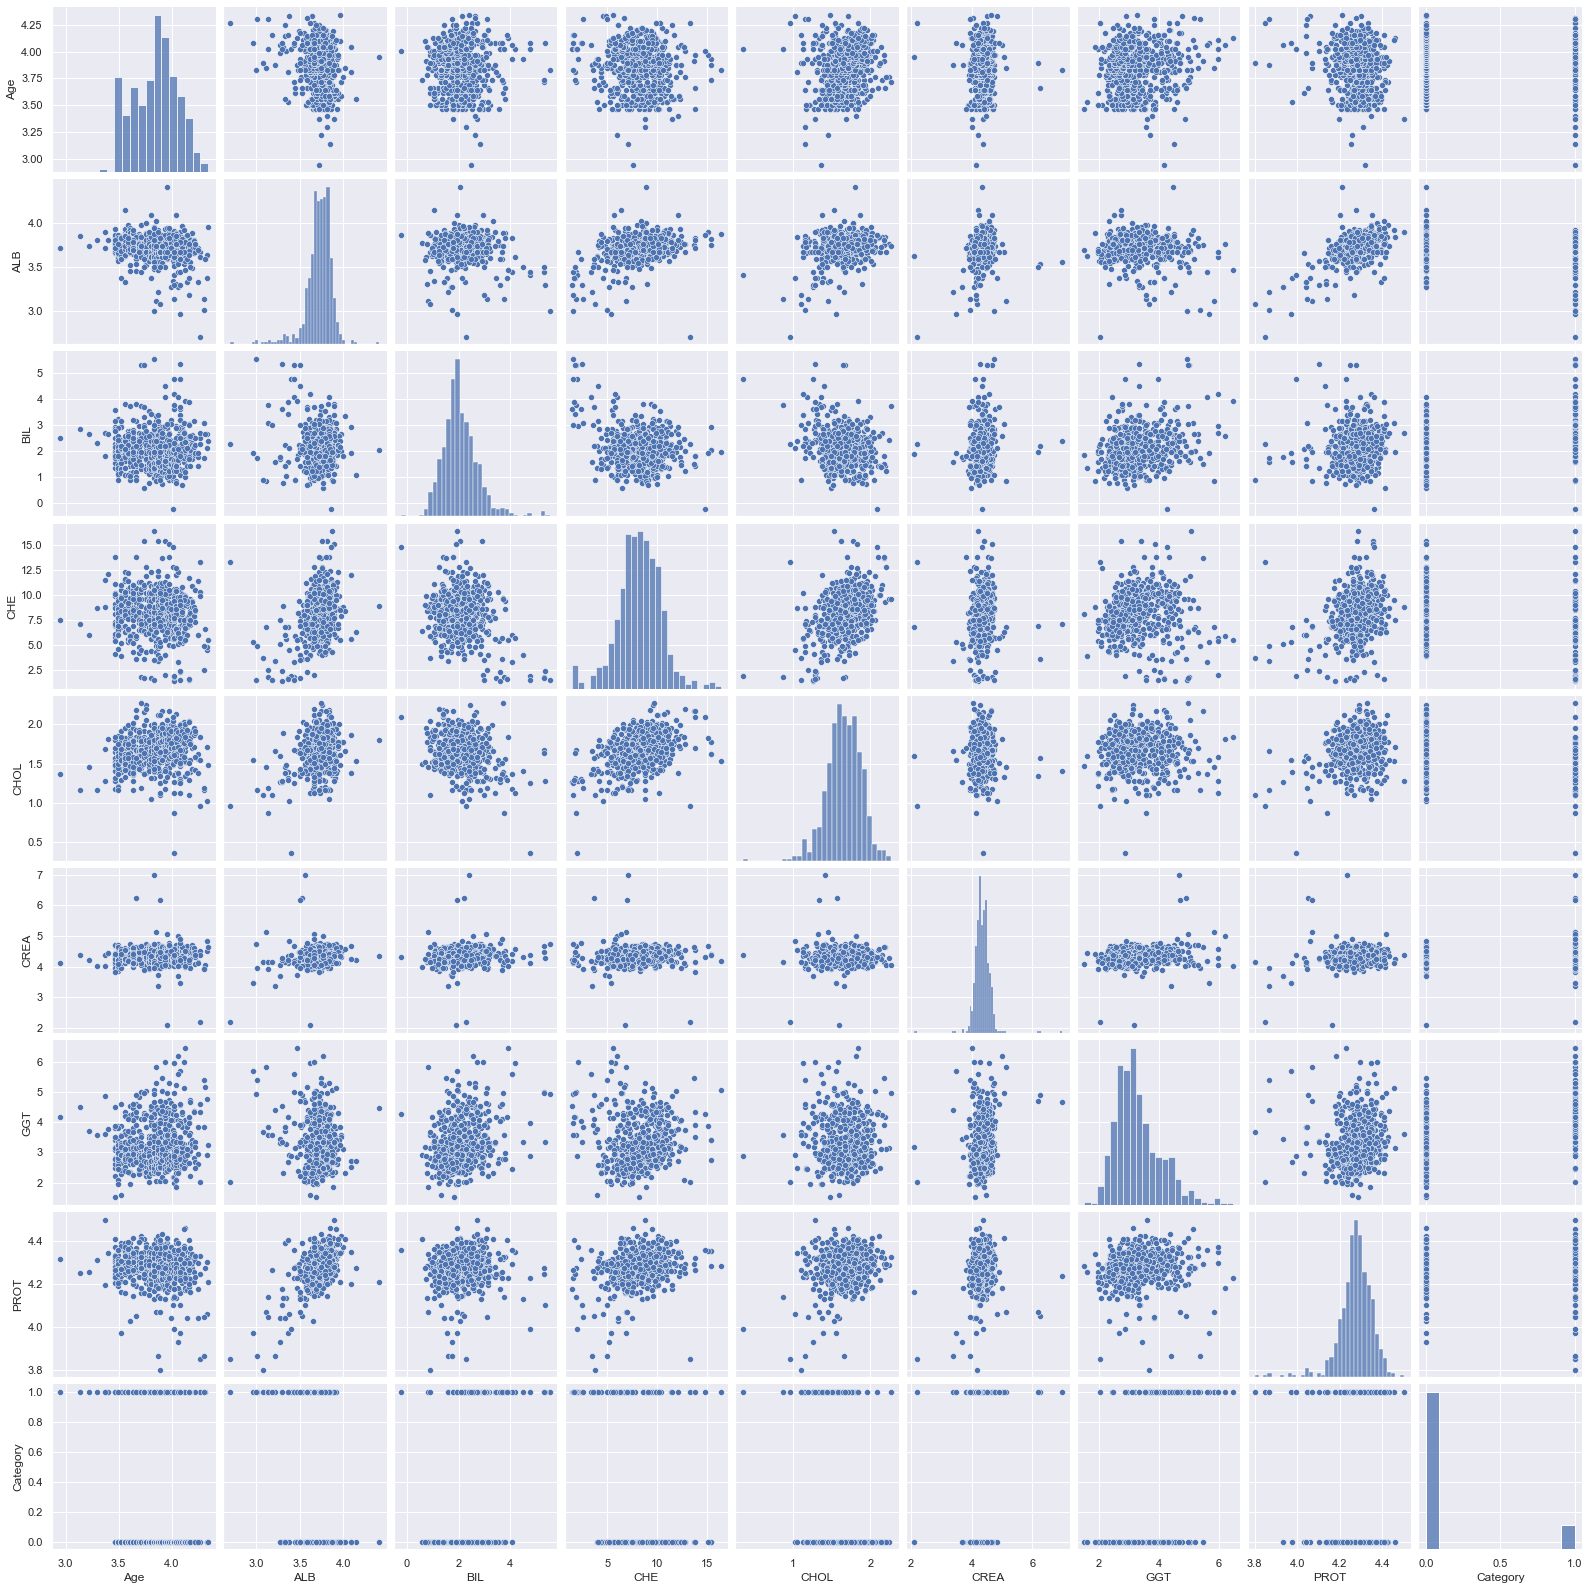

In [271]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Age',"ALB","BIL","CHOL","CREA","GGT","PROT"]] = np.log(df_1[['Age',"ALB","BIL","CHOL","CREA","GGT","PROT"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным, где сразу увидим, что в переменных "ALB", "CHOL", "PROT" имеются пропущенные значения.

In [272]:
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,41.620195,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,0.133333
std,10.055105,5.780629,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,0.340211
min,19.000000,14.900000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.950000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,82.200000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,1.000000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [273]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения изменились прктически по всем переменным (кроме "Age") и соответствуют нормальному распределению, что говорит об отсутствии выбросов.

In [274]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,41.619034,10.263274,8.191132,5.365605,79.023852,36.816201,72.117792,0.133333
std,10.055105,5.368663,10.138949,2.184622,1.118583,19.472858,37.237116,5.090528,0.340211
min,19.000000,24.278307,0.800000,1.579662,1.969914,8.000000,4.500000,55.836230,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.950000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,58.495497,70.416197,14.809541,8.758481,230.556303,203.516384,87.434438,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [275]:
df.dtypes

Age           int64
Sex          object
ALB         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
Category      int64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений.
Выведем общее количество и процент пропусков по переменным. Как было указано ранее, пропуски присутствуютв 3 переменных.

In [276]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
CHOL,10,0.016260
PROT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CREA,0,0.000000
CHE,0,0.000000
BIL,0,0.000000
Sex,0,0.000000
Age,0,0.000000


С помощью написанной ниже функции для числовых переменных заполняем пропуски средними значениями.

In [277]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в нашщ датафрейм уже очищенные данные.

In [278]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных

In [279]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CREA,0,0.0
CHOL,0,0.0
CHE,0,0.0
BIL,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Повторно выведем статистику и убедимся, что данные подготовлены и могут использоваться для моделирования.

In [282]:
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.619034,10.263274,8.191132,5.365605,79.023852,36.816201,72.117792,0.133333
std,10.055105,5.364289,10.138949,2.184622,1.109437,19.472858,37.237116,5.086381,0.340211
min,19.000000,24.278307,0.800000,1.579662,1.969914,8.000000,4.500000,55.836230,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000,0.000000
max,77.000000,58.495497,70.416197,14.809541,8.758481,230.556303,203.516384,87.434438,1.000000


Предварительно построим корреляционную матрицу для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
Как можно определить изначально, большее влияние имеет переменная BIL, далее GGT.

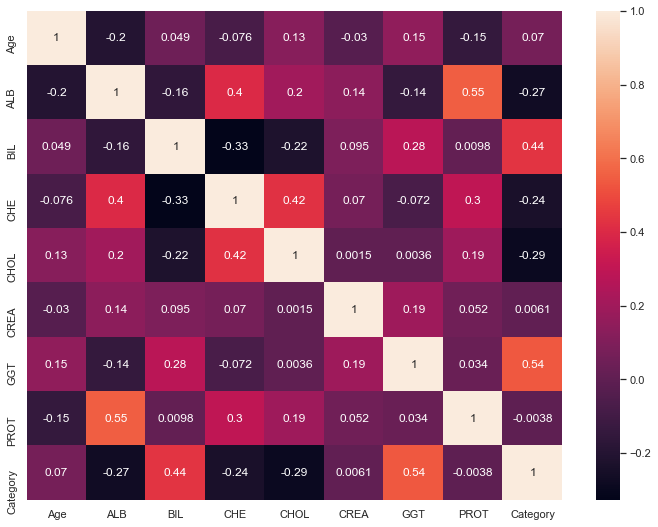

In [283]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Logistic Regression

Первым шагом для построения логистической регрессии нам необходимо произвести кодирование категориальных переменных. После выполнения представленной функции, записываем закодированные данные в датафрейм и выводим результат.

In [297]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [298]:
# Encoding categorical data
df = encoding_char(df)

In [299]:
df

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,0,38.500000,7.5,6.930000,3.23,106.0,12.100000,69.0,0.0
1,32.0,0,38.500000,3.9,11.170000,4.80,74.0,15.600000,76.5,0.0
2,32.0,0,46.900000,6.1,8.840000,5.20,86.0,33.200000,79.3,0.0
3,32.0,0,43.200000,18.9,7.330000,4.74,80.0,33.800000,75.7,0.0
4,32.0,0,39.200000,9.6,9.150000,4.32,76.0,29.900000,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.000000,50.0,5.570000,6.30,55.7,203.516384,68.5,1.0
611,64.0,1,24.278307,20.0,1.579662,3.02,63.0,35.900000,71.3,1.0
612,64.0,1,29.000000,48.0,1.660000,3.63,66.7,64.200000,82.0,1.0
613,46.0,1,33.000000,20.0,3.560000,4.20,52.0,50.000000,71.0,1.0


Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [300]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [301]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Построим базовую модель и выведем по ней отчет. Как показывает статистика, значимыми являются переменнные Х3, Х4, Х6, Х8, Х9, где P-value не привышает порог в 3 %.

In [302]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.514064
         Iterations 7
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.292  
Dependent Variable: y                AIC:              523.8387
Date:               2020-11-23 12:42 BIC:              561.6250
No. Observations:   492              Log-Likelihood:   -252.92 
Df Model:           8                LL-Null:          -195.80 
Df Residuals:       483              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1       0.0989     0.1145    0.8639   0.3877   -0.1255    0.3233
x2       0.0822     0.1245    0.6602   0.5091   -0.1618    0.3261
x3      -0.4425  

Для убеждения  правильности отбора переменных проведем автоматический отбор.

In [303]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

5
[False False  True  True False  True False  True  True]
[5 4 1 1 2 1 3 1 1]


Выведем индексы отобранных переменных.

In [304]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[2, 3, 5, 7, 8]
№	Index	Feature
0	2	ALB
1	3	BIL
2	5	CHOL
3	7	GGT
4	8	PROT


In [305]:
# Leaving only Selected Features
#X_train_select=X_train[:, selected_columns]
#X_test_select=X_test[:, selected_columns]

Преобразуем обучающую и тестовую выборки, оставив в ней только значимые переменные. Изначально мною были включены переменные, у которых p-value < 1%, в такой ситуации переменная Х9 искючалась из модели, что давало точность меньшую, чем  в случае ее включения. Поєтому я решила оставить вариант учета переменных с p-value < 3%.

In [306]:
# p-value < 3% Features
X_train = X_train[:,[2,3,5,7,8]]
X_test = X_test[:,[2,3,5,7,8]]

Обучим модель логистическй регрессии на 5 переменных.

In [307]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Проведем прогноз на тестовой выборке и оценим качетво модели. Уровень качества высокий, 91,87% объектов распознаны верно.

In [308]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.9186991869918699

Выведем таблицу сопряженности, которая показывает, что 8 позитивных объектов распознаны как негативные, а 2
негативных определены как позитивные.

In [309]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  8   7]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [310]:
Error_rate = (8+2)/(123)
Error_rate

0.08130081300813008

In [311]:
Se = 7/(7+8)
Se

0.4666666666666667

In [312]:
Sp = 106/(106+2)
Sp

0.9814814814814815

Итак, можно увидеть, что в модели логистической регрессии чувствительность составляет 46%, специфичность 98%.Это говорит, что модел лучше определяет истинно негативные слачаи.
Доля ошибки низкая = 8%, точность высокая = 91,86%.
Это наш базовый уровень для построения НС.

К сожалению,визуализировать данные не представляется возможным из-за количества взятых переменных.

# Classification Neural Network

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [313]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Построим нейронную сеть прямой передачи сигнала: 
Так как мы имеем дело с моделью классификации, то необходимо создавать сужающую структуру. Поэтому т.к. параметры мною были выбраны 5 параметров классификации, но та входном слое НС будем иметь 5 нейронов, а на первом слое возьмем количество меньшее, равное 4. используем функцию активации "relu".
На втором слое возьмем 1 нейрон, так как мы имеем всего два класса (число выходов в начем случае = 2-1). Будем использовать сигмоидальную функцию активации, так как она изменяется в диапазоне от 0 до 1, что соответствует нашей эндогенной переменной.
Стоит отметить, что такие настройки НС были окончательно взяты после ряда подборов значений, и изменений точности модели.

In [399]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu', input_dim = 5))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=4, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [400]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 492 samples, validate on 123 samples
Epoch 1/100
492/492 [==============================] - 1s 1ms/step - loss: 0.6783 - accuracy: 0.8598 - val_loss: 0.6601 - val_accuracy: 0.8780
Epoch 2/100
492/492 [==============================] - 0s 435us/step - loss: 0.6359 - accuracy: 0.8638 - val_loss: 0.6072 - val_accuracy: 0.8780
Epoch 3/100
492/492 [==============================] - 0s 461us/step - loss: 0.5715 - accuracy: 0.8638 - val_loss: 0.5369 - val_accuracy: 0.8780
Epoch 4/100
492/492 [==============================] - 0s 457us/step - loss: 0.4974 - accuracy: 0.8659 - val_loss: 0.4643 - val_accuracy: 0.8943
Epoch 5/100
492/492 [==============================] - 0s 508us/step - loss: 0.4275 - accuracy: 0.8780 - val_loss: 0.4007 - val_accuracy: 0.9024
Epoch 6/100
492/492 [==============================] - 0s 465us/step - loss: 0.3692 - accuracy: 0.9004 - val_loss: 0.3521 - val_accuracy: 0.9024
Epoch 7/100
492/492 [==============================] - 0s 453us/step - loss: 0.3250 - 

Epoch 57/100
492/492 [==============================] - 0s 305us/step - loss: 0.1798 - accuracy: 0.9329 - val_loss: 0.2163 - val_accuracy: 0.9187
Epoch 58/100
492/492 [==============================] - 0s 311us/step - loss: 0.1794 - accuracy: 0.9329 - val_loss: 0.2158 - val_accuracy: 0.9187
Epoch 59/100
492/492 [==============================] - 0s 289us/step - loss: 0.1791 - accuracy: 0.9329 - val_loss: 0.2156 - val_accuracy: 0.9187
Epoch 60/100
492/492 [==============================] - 0s 299us/step - loss: 0.1790 - accuracy: 0.9329 - val_loss: 0.2151 - val_accuracy: 0.9187
Epoch 61/100
492/492 [==============================] - 0s 305us/step - loss: 0.1786 - accuracy: 0.9329 - val_loss: 0.2151 - val_accuracy: 0.9187
Epoch 62/100
492/492 [==============================] - 0s 291us/step - loss: 0.1784 - accuracy: 0.9329 - val_loss: 0.2150 - val_accuracy: 0.9187
Epoch 63/100
492/492 [==============================] - 0s 325us/step - loss: 0.1785 - accuracy: 0.9350 - val_loss: 0.2151 -

Построим График, который демонстрирует уменьшение потерь по выборкам.

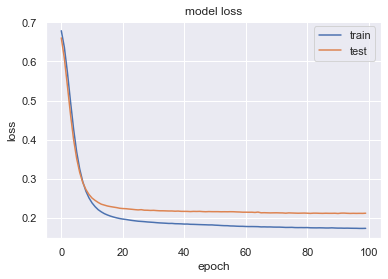

In [401]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Произведем прогноз на тестовой выборке, задав порог = 0,35 (подобран в ходе экспериментов)

In [423]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.36)

Выведем таблицу сопряженности, которая показывает, что 4 позитивных объектов распознаны как негативные, а 4
негативных определены как позитивные.

In [424]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   4]
 [  4  11]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [425]:
Accurary_rate = (104+11)/(123)
Accurary_rate

0.9349593495934959

In [428]:
Error_rate = (4+4)/(123)
Error_rate

0.06504065040650407

In [429]:
Se = 11/(11+4)
Se

0.7333333333333333

In [430]:
Sp = 104/(104+4)
Sp

0.9629629629629629

По сравнению с простой логистической регрессией(91,86%) модель НС имеет более высокую тосность = 93,5%. Доля ошибок снизилась с 8 % до 6,5%.
При этом значительно возрасла чувстивельность с 46% до 73%, а специфичность незначительно сократилась с 98% до 96%. 

В итоге получаем результат результат, который несколько лучше базовой модели.